In [14]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score


## Working with Data

In [16]:
df = pd.read_csv('bankloans.csv')

In [18]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [20]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [22]:
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Name: count, Length: 700, dtype: int64

In [24]:
df = df.dropna()

In [26]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

## Visualising Data

C:\Users\Afeki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Afeki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='income'>

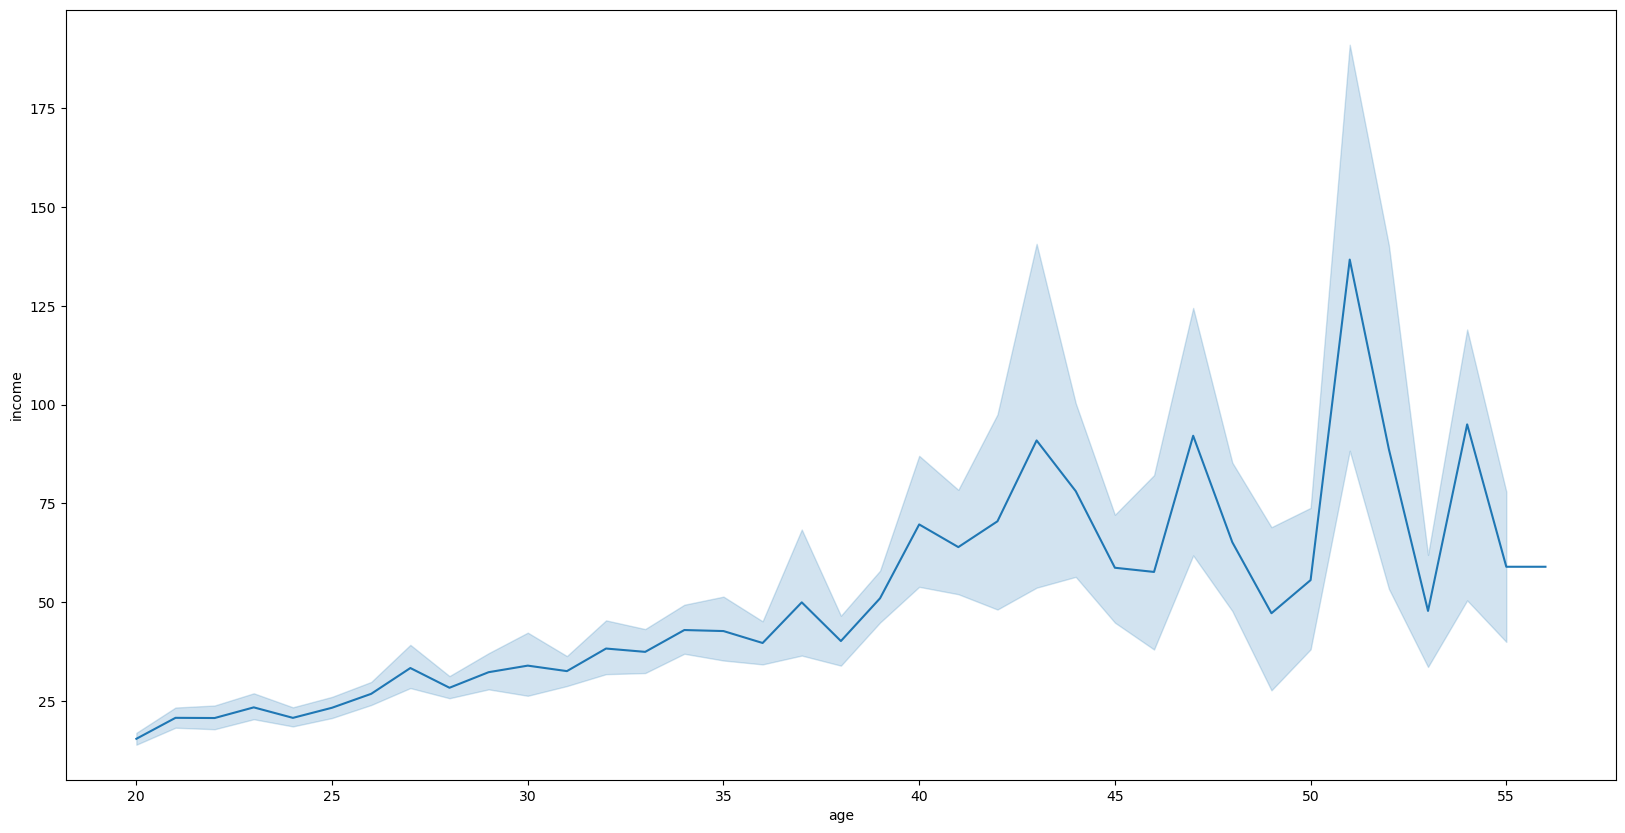

In [30]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="age",y="income", data=df,ax=ax)

C:\Users\Afeki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Afeki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='debtinc'>

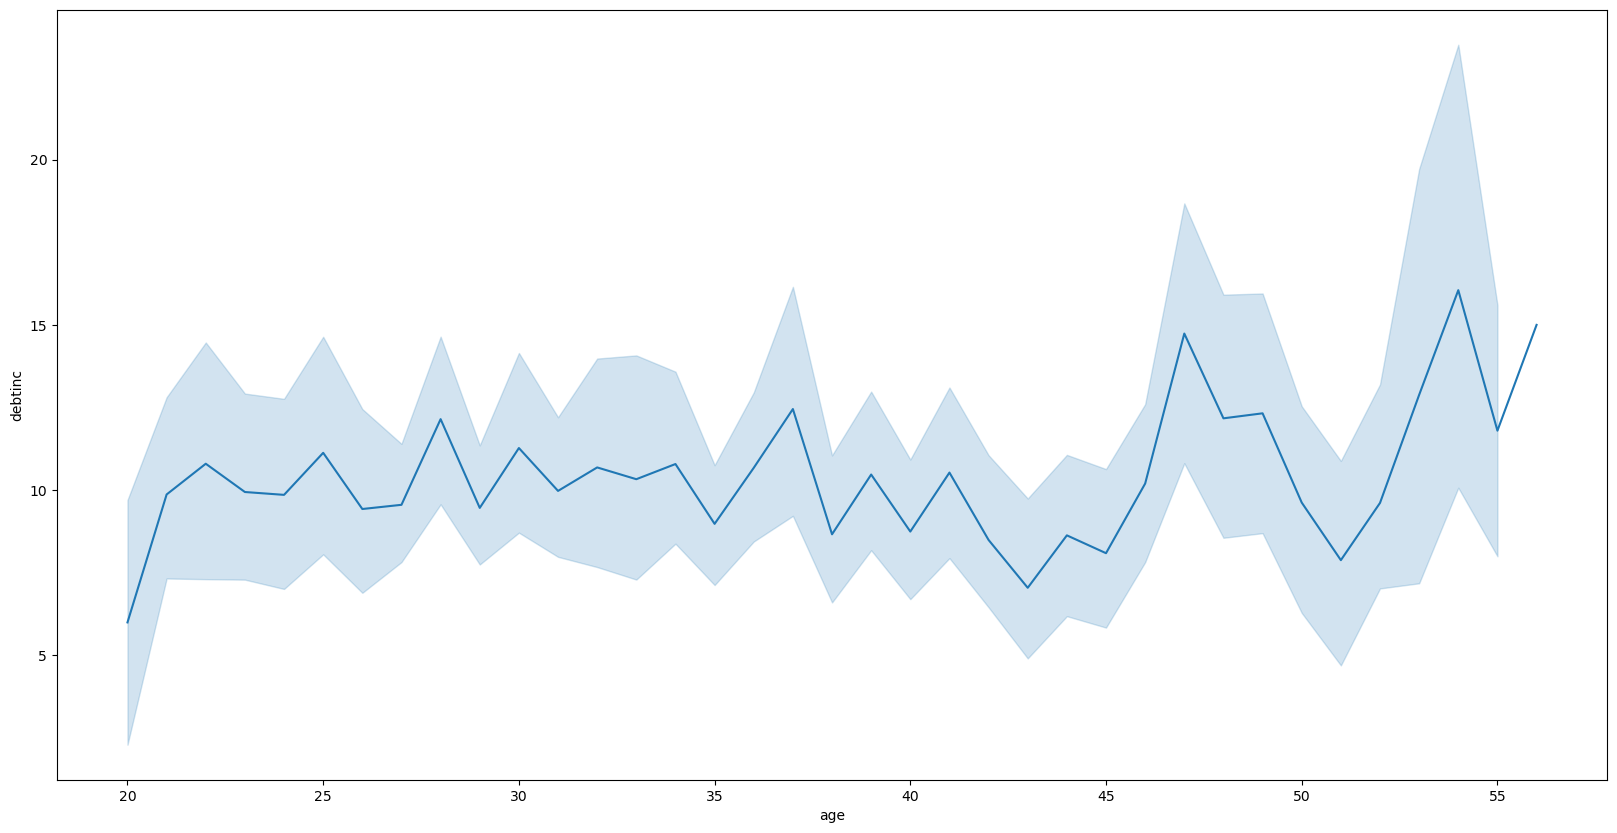

In [32]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="age",y="debtinc", data=df,ax=ax)

In [42]:
df['default'].value_counts()

default
0.0    517
1.0    183
Name: count, dtype: int64

## Train Test Split on Data

In [46]:
x=df.drop(['default'],axis=1)
y=df['default']

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [50]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

## Creating Model

In [55]:
rfc = RandomForestClassifier(n_estimators=200)

In [57]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [59]:
rfc.score(x_test,y_test)

0.8095238095238095

In [65]:
rfc2 = cross_val_score(estimator=rfc,X=x_train,y=y_train,cv=10)
rfc2.mean() 

0.7755102040816326

## Support  Vector Machine

In [68]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [70]:
sv.score(x_test,y_test)

0.8285714285714286

In [73]:
model = GridSearchCV(sv,{
    'C':[0.1,0.2,0.4,0.8,1.2,1.9,4.6],
    'gamma':[0.1,0.2,0.4,0.9,1.1,2,5],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)

In [75]:
model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.9, 4.6],
                         'gamma': [0.1, 0.2, 0.4, 0.9, 1.1, 2, 5],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [77]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [81]:
model2 = SVC(C=0.1,gamma=0.1,kernel='linear')
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.8523809523809524

## Logistic Regression

In [84]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.861904761904762

<Axes: >

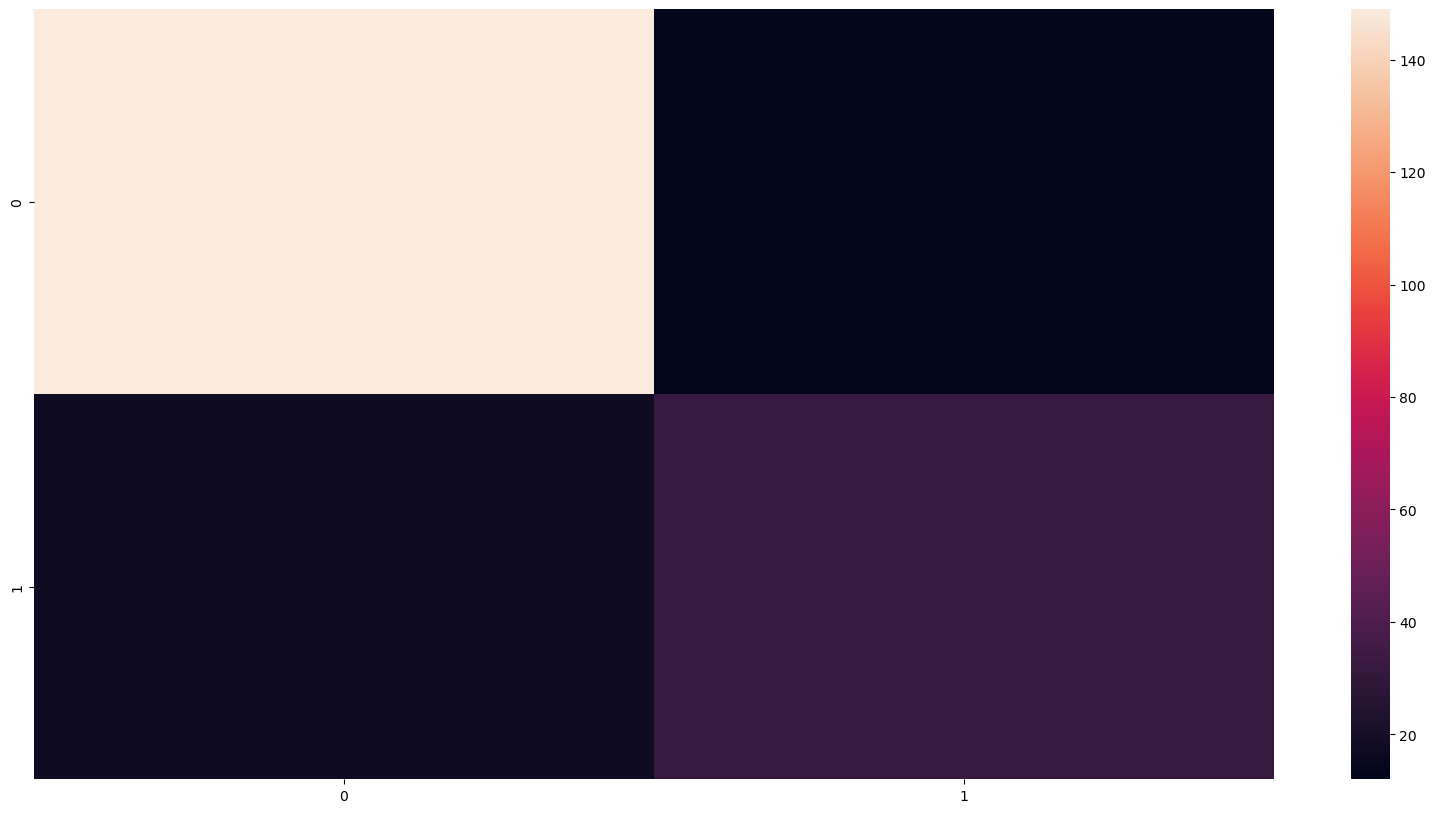

In [88]:
yp = lr.predict(x_test)
c = confusion_matrix(y_test,yp)
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(c,ax=ax)